In [2]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2020-04-18 02:30:24--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 52.85.107.15, 52.85.107.28, 52.85.107.230, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|52.85.107.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.08s   

2020-04-18 02:30:25 (635 KB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [0]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome("lambda_virus.fa")

In [9]:
len(genome)

48502

In [0]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [0]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences


In [0]:
numMatch = 0
n = 0
for r in genome:
  matches = naive (r, ref)
  if r != reverseComplement(r):
    matches.extend(naive (reverseComplement(r), ref))
    n +=1
    if len(matches) > 0:
        numMatch += 1
print("%d /%d reads matches the genome" % (numMatch, n))

In [21]:
numMatch = 0
n = 0
matches = naive ("AGTCGA", genome)
if "AGTCGA" != reverseComplement("AGTCGA"):
    matches.extend(naive(reverseComplement("AGTCGA"), genome))
else:
  end
    
print(matches)

[18005, 23320, 33657, 44806, 450, 1908, 2472, 41927, 45369]


In [0]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        mismatch = 0
        for j in range(len(p)):
            if t[i+j] != p[j]:
                mismatch += 1
        if mismatch <= 2:
          occurrences.append(i)
    return occurrences

In [0]:
code = "AGGAGGTT"

In [31]:
numMatch = 0
n = 0
matches = naive_2mm (code, genome)
    
print(len(matches))

215


In [32]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2020-04-18 03:08:45--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.32.81.145, 13.32.81.9, 13.32.81.156, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.32.81.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.1s    

2020-04-18 03:08:45 (1.97 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [0]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [0]:
reads, _ = readFastq("ERR037900_1.first1000.fastq")

In [55]:
len(reads)

1000

In [0]:
def findGCbyPosition(Reads):
  gc = [0]*100
  total = [0]*100

  for r in Reads:
    for i in range(len(r)):
      if r[i]=="G" or r[i]=="C":
        gc[i] += 1
      total[i] += 1
  
  for i in range(len(gc)):
    if total [i] >0:
      gc[i] /= float(total[i])
  return gc

In [0]:
gc = findGCbyPosition(reads)

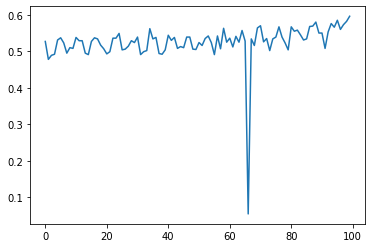

In [66]:
import matplotlib.pyplot as plt
plt.plot (range(len(gc)), gc)
plt.show()

In [69]:
for i in range(len(gc)):
  if gc[i] < 0.1:
    print (i)

66
